In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df_train = pd.read_csv("movie-review-sentiment-analysis-kernels-only/train.tsv", sep='\t')
df_test = pd.read_csv("movie-review-sentiment-analysis-kernels-only/test.tsv", sep='\t')

In [61]:
df_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [62]:
df_test

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [63]:
df_train.Sentiment.value_counts() # different emotions

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [67]:
p = 79582 + 32927 + 27273 + 9206 + 7072
32927/p

0.21098936306548763

In [4]:
df_train_1 = df_train.drop(['PhraseId','SentenceId'],axis=1)# remove unimportant columns
df_train_1.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [5]:
df_train_1['phrase_len'] = [len(t) for t in df_train_1.Phrase] 
df_train_1.head()

,Phrase,Sentiment,phrase_len
0,A series of escapades demonstrating the adage ...,1,188
1,A series of escapades demonstrating the adage ...,2,77
2,A series,2,8
3,A,2,1
4,series,2,6


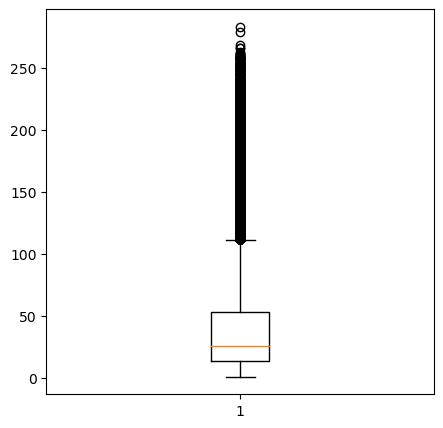

In [6]:
df_train_1['phrase_len'].describe () #sentence length
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(df_train_1.phrase_len)
plt.show()

In [7]:
neg_phrases = df_train_1[df_train_1.Sentiment == 0]# negative words
neg_words = []
for t in neg_phrases.Phrase:
    neg_words.append(t)
neg_words[:5]


['would have a hard time sitting through this one',
 'have a hard time sitting through this one',
 'Aggressive self-glorification and a manipulative whitewash',
 'self-glorification and a manipulative whitewash',
 'Trouble Every Day is a plodding mess .']

In [8]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')# negative text
neg_text[:235]

'would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess .'

In [9]:
for t in neg_phrases.Phrase[:300]:
    if 'good' in t:
        print(t)

's not a particularly good film
covers huge , heavy topics in a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people .
huge , heavy topics in a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people
a bland , surfacey way that does n't offer any insight into why , for instance , good things happen to bad people


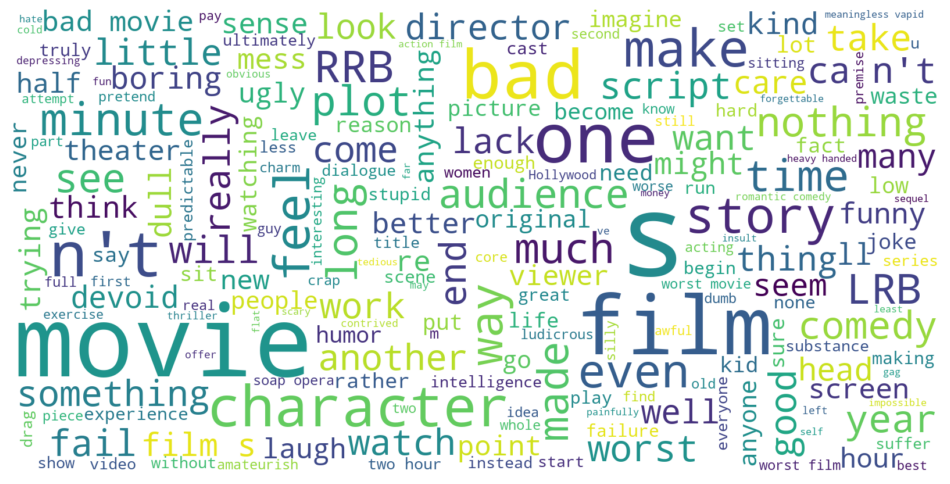

In [10]:
#negative wordcloud
from wordcloud import WordCloud
wordcloud_neg = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
pos_phrases = df_train_1[df_train_1.Sentiment == 4]
pos_string = []
for t in pos_phrases.Phrase:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')

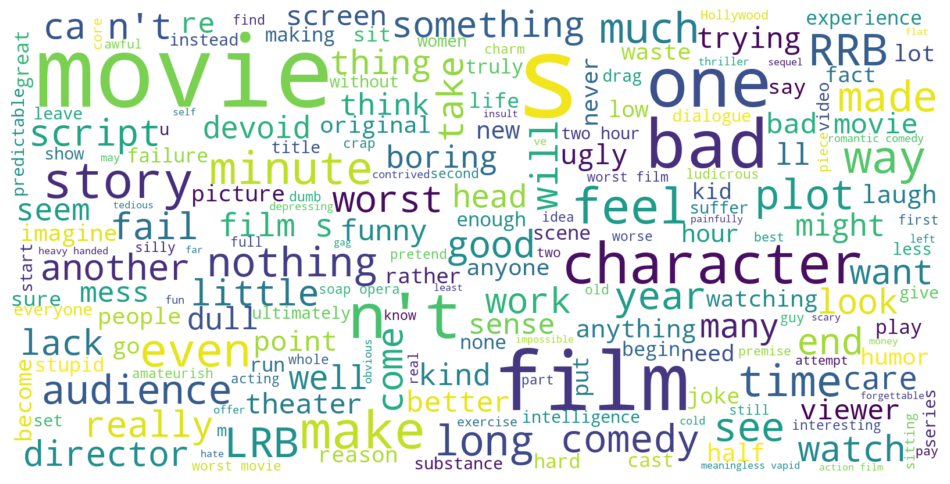

In [12]:
from wordcloud import WordCloud
wordcloud_pos = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(df_train_1.Phrase)
CountVectorizer(min_df=0.0, ngram_range=(1, 2))

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [14]:
len(cvector.get_feature_names())

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


94644

In [39]:
#Get the word frequency of each class
All_matrix=[]
All_words=[]
All_labels=['negative','somewhat negative','neutral','somewhat positive','positive']
neg_matrix = cvector.transform(df_train_1[df_train_1.Sentiment == 0].Phrase)
term_freq_df= pd.DataFrame(list(sorted([(word, neg_matrix.sum(axis=0)[0, idx]) for word, 
                                        idx in cvector.vocabulary_.items()], 
                                       key = lambda x: x[1], reverse=True)),
                           columns=['Terms','negative'])
term_freq_df=term_freq_df.set_index('Terms')
for i in range(1,5):
    All_matrix.append(cvector.transform(df_train_1[df_train_1.Sentiment == i].Phrase))
    All_words.append(All_matrix[i-1].sum(axis=0))
    aa=pd.DataFrame(list(sorted([(word,All_words[i-1][0, idx]) for word, 
                                 idx in cvector.vocabulary_.items()], 
                                key = lambda x: x[1], reverse=True)),
                    columns=['Terms',All_labels[i]])
    
    term_freq_df=term_freq_df.join(aa.set_index('Terms'),how='left',lsuffix='_A')

    

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['somewhat negative'] + term_freq_df['neutral'] + term_freq_df['somewhat positive'] +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(100)

,negative,somewhat negative,neutral,somewhat positive,positive,total
Terms,,,,,,
the,3462,10885,20619,12459,4208,51633
of,2277,6660,12287,8405,3073,32702
and,2549,6204,10241,9180,4003,32177
to,1916,5571,8295,5411,1568,22761
in,1038,2965,5562,3365,1067,13997
...,...,...,...,...,...,...
they,88,305,497,259,62,1211
made,107,251,389,310,141,1198
old,94,272,493,264,57,1180


In [40]:
term_freq_df

,negative,somewhat negative,neutral,somewhat positive,positive,total
Terms,,,,,,
the,3462,10885,20619,12459,4208,51633
and,2549,6204,10241,9180,4003,32177
of,2277,6660,12287,8405,3073,32702
to,1916,5571,8295,5411,1568,22761
is,1372,3362,3703,3489,1550,13476
...,...,...,...,...,...,...
obsession beneath,0,1,6,0,0,7
beneath hearst,0,1,7,0,0,8
hearst forced,0,1,8,0,0,9


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df_train_1.Phrase)
neg_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 0].Phrase)
som_neg_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 1].Phrase)
neu_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 2].Phrase)
som_pos_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 3].Phrase)
pos_matrix = cvec.transform(df_train_1[df_train_1.Sentiment == 4].Phrase)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')


som_neg_words = som_neg_matrix.sum(axis=0)
som_neg_words_freq = [(word, som_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_neg_tf = pd.DataFrame(list(sorted(som_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','somewhat negative'])
som_neg_tf_df = som_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

som_pos_words = som_pos_matrix.sum(axis=0)
som_pos_words_freq = [(word, som_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
som_pos_words_tf = pd.DataFrame(list(sorted(som_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','somewhat positive'])
som_pos_words_tf_df = som_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,som_neg_tf_df,neu_words_tf_df,som_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['somewhat negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['somewhat positive'] \
                                 +  term_freq_df['positive'] 
        
term_freq_df.sort_values(by='total', ascending=False).head(15)

,negative,somewhat negative,neutral,somewhat positive,positive,total
Terms,,,,,,
film,480,1281,2175,1848,949,6733
movie,793,1463,2054,1344,587,6241
like,332,942,1167,599,150,3190
story,153,532,954,664,236,2539
rrb,131,498,1112,551,146,2438
good,100,334,519,974,334,2261
lrb,119,452,878,512,137,2098
time,153,420,752,464,130,1919
characters,167,455,614,497,149,1882


Text(0.5, 1.0, 'Top 50 tokens in negative movie reviews')

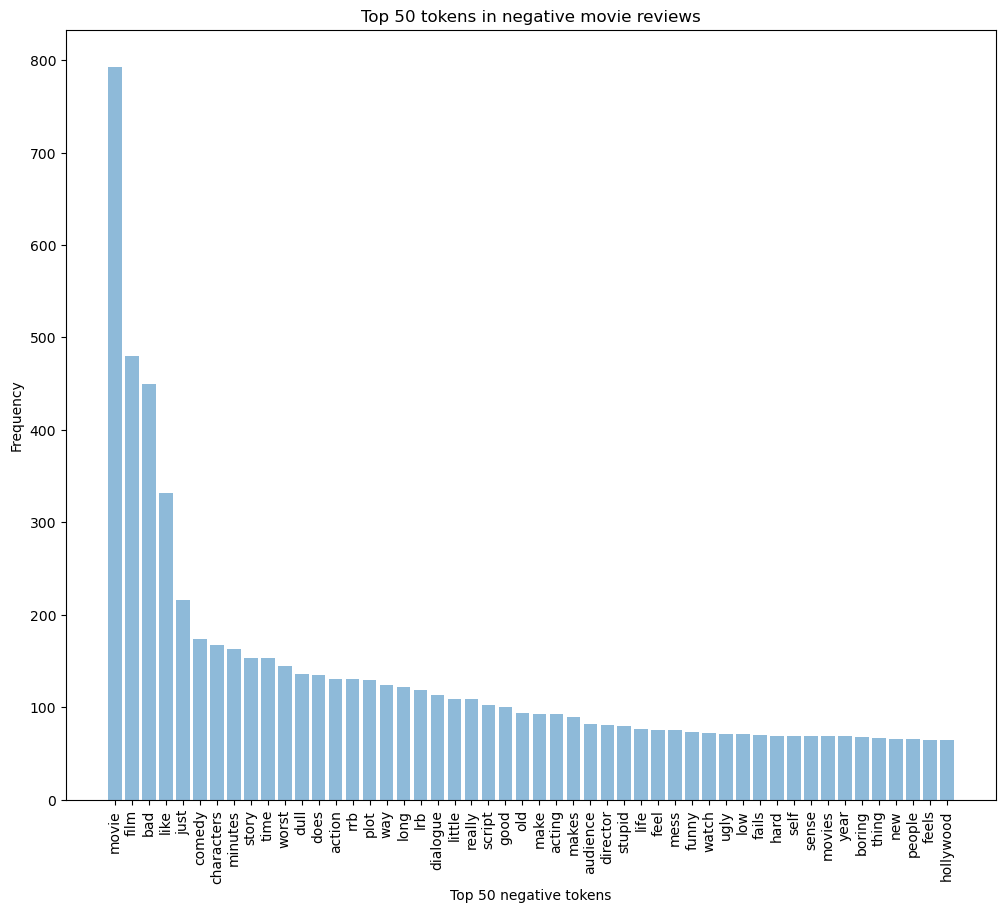

In [17]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

Text(0.5, 1.0, 'Top 50 tokens in positive movie reviews')

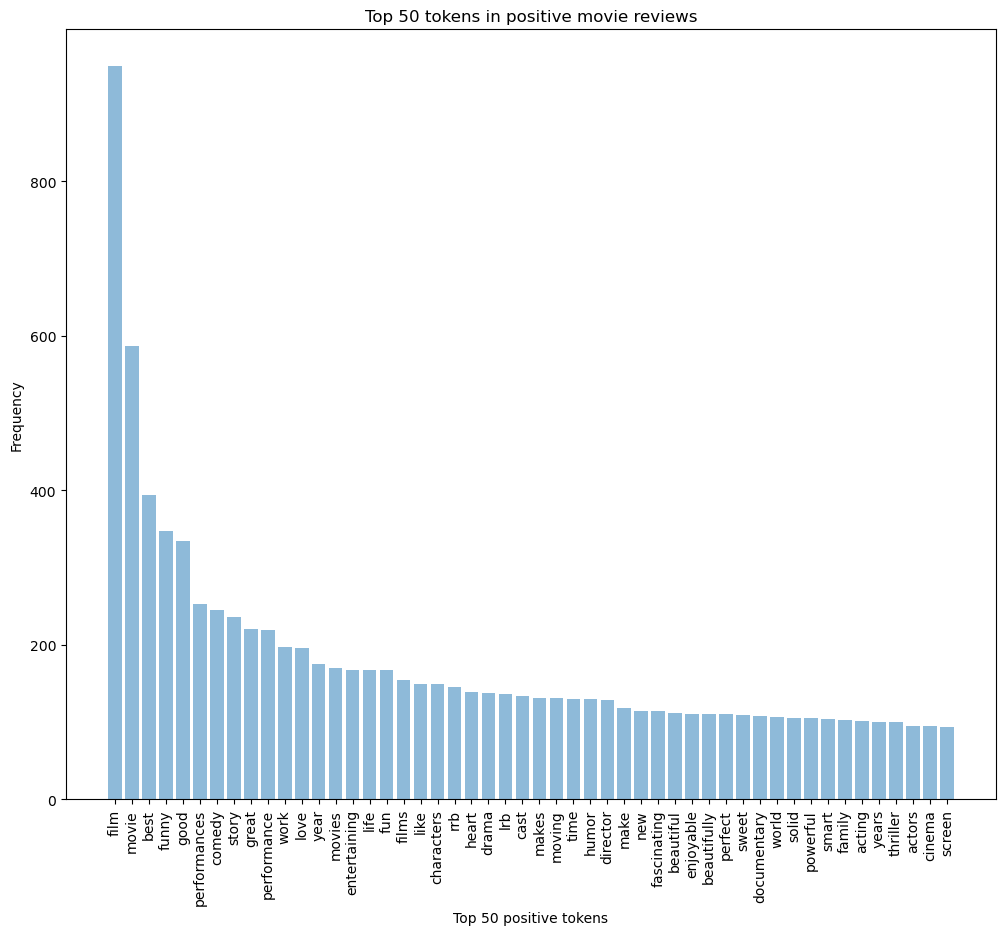

In [18]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive movie reviews')

In [19]:
from sklearn.model_selection import train_test_split   
phrase = np.array(df_train_1['Phrase'])
sentiments = np.array(df_train_1['Sentiment'])
 
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## build CountVectorize on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

# build TfidfVectorizer on train phrases
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)

# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)


In [41]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [43]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#svc = svm.SVC(kernel = 'rbf')
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
sgd = SGDClassifier(loss='hinge')

In [44]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_bow_predictions,
                                      classes=[0,1,2,3,4])
                                    
#plot_model_roc_curve(clf , features, true_labels, label_encoder=None, class_names=None)

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.6369
Precision: 0.6176
Recall: 0.6369
F1 Score: 0.613

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.55      0.28      0.37      1426
           1       0.53      0.36      0.43      5428
           2       0.68      0.88      0.77     15995
           3       0.57      0.44      0.50      6603
           4       0.55      0.35      0.42      1760

    accuracy                           0.64     31212
   macro avg       0.58      0.46      0.50     31212
weighted avg       0.62      0.64      0.61     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        405   610    353    51    7
        1        261  1945   2954   247   21
        2         61   848  14007  1010   69
        3         15   232   3039  2912 

C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


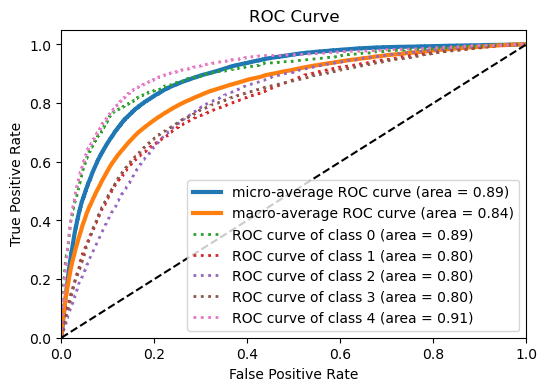

In [45]:
plot_model_roc_curve(lr , cv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [46]:
sgd_bow_predictions = train_predict_model(classifier=sgd, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_bow_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.5988
Precision: 0.578
Recall: 0.5988
F1 Score: 0.5446

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.51      0.24      0.33      1426
           1       0.54      0.19      0.28      5428
           2       0.62      0.93      0.74     15995
           3       0.55      0.29      0.38      6603
           4       0.53      0.28      0.37      1760

    accuracy                           0.60     31212
   macro avg       0.55      0.39      0.42     31212
weighted avg       0.58      0.60      0.54     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        341   380    654    48    3
        1        242  1023   3916   218   29
        2         67   376  14919   579   54
        3         17   115   4207  1913 

C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


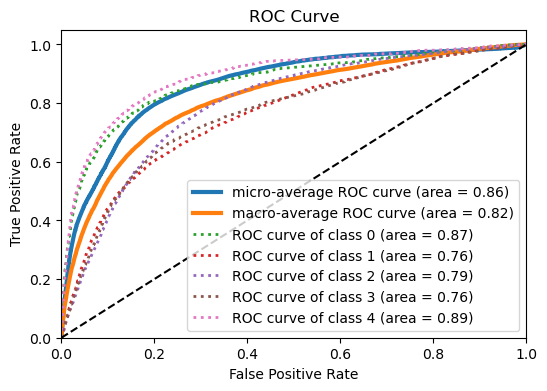

In [47]:
plot_model_roc_curve(sgd , cv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [48]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[0,1,2,3,4])

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.6455
Precision: 0.6314
Recall: 0.6455
F1 Score: 0.6189

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.60      0.22      0.32      1426
           1       0.56      0.38      0.45      5428
           2       0.67      0.89      0.77     15995
           3       0.60      0.47      0.53      6603
           4       0.60      0.29      0.39      1760

    accuracy                           0.65     31212
   macro avg       0.61      0.45      0.49     31212
weighted avg       0.63      0.65      0.62     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        312   681    408    22    3
        1        177  2051   3066   125    9
        2         29   793  14193   944   36
        3          2   109   3115  3088

C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


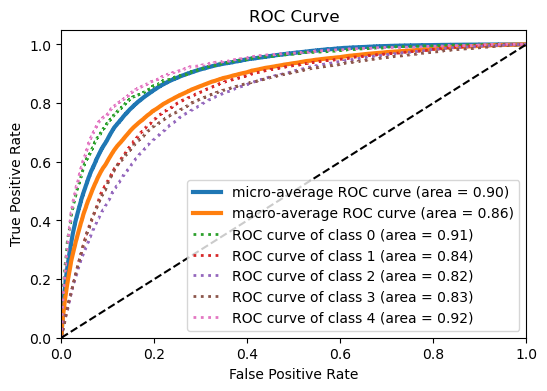

In [49]:
plot_model_roc_curve(lr , tv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [50]:
# SGD model on TF-IDF
sgd_tfidf_predictions = train_predict_model(classifier=sgd, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=sgd_tfidf_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.5593
Precision: 0.5537
Recall: 0.5593
F1 Score: 0.4671

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.62      0.11      0.19      1426
           1       0.52      0.09      0.16      5428
           2       0.56      0.96      0.71     15995
           3       0.54      0.17      0.26      6603
           4       0.59      0.15      0.23      1760

    accuracy                           0.56     31212
   macro avg       0.57      0.30      0.31     31212
weighted avg       0.55      0.56      0.47     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   0    1      2     3    4
Actual: 0        156  244   1013    12    1
        1         82  514   4753    72    7
        2         13  198  15429   332   23
        3          2   39   5316  1101  145


C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


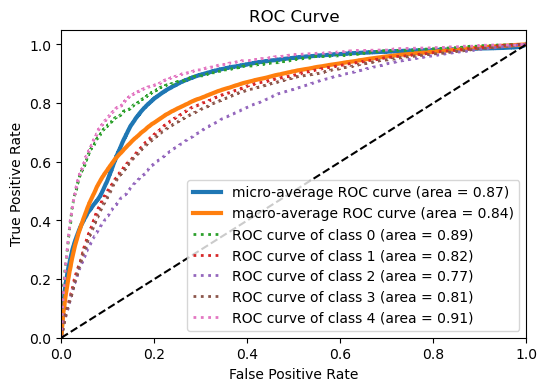

In [51]:
plot_model_roc_curve(sgd , tv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [53]:
rfc_tfidf_predictions = train_predict_model(classifier=rfc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6436
Precision: 0.6281
Recall: 0.6436
F1 Score: 0.6285

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.48      0.37      0.42      1426
           1       0.56      0.42      0.48      5428
           2       0.70      0.84      0.76     15995
           3       0.58      0.47      0.52      6603
           4       0.50      0.40      0.45      1760

    accuracy                           0.64     31212
   macro avg       0.56      0.50      0.53     31212
weighted avg       0.63      0.64      0.63     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        529   597    284    14    2
        1        463  2273   2553   128   11
        2         96  1087  13507  1236   69
        3         10   116   2793  3071

C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


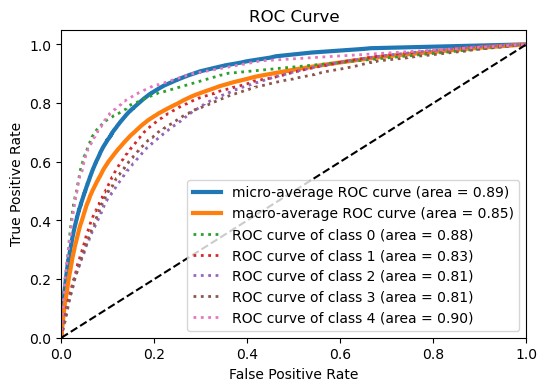

In [54]:
plot_model_roc_curve(rfc , tv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [69]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

In [70]:
lsvc_tfidf_predictions = train_predict_model(classifier=lsvc, 
                                                train_features=tv_train_features, train_labels=sentiments_train,
                                                test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lsvc_tfidf_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6558
Precision: 0.6444
Recall: 0.6558
F1 Score: 0.6472

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.51      0.37      0.43      1426
           1       0.55      0.49      0.52      5428
           2       0.73      0.82      0.77     15995
           3       0.58      0.52      0.55      6603
           4       0.54      0.43      0.48      1760

    accuracy                           0.66     31212
   macro avg       0.58      0.53      0.55     31212
weighted avg       0.64      0.66      0.65     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        524   703    187    12    0
        1        414  2648   2212   147    7
        2         90  1301  13083  1467   54
        3          5   155   2392  3458

C:\Users\13906\AppData\Local\Temp\ipykernel_12896\2946138018.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


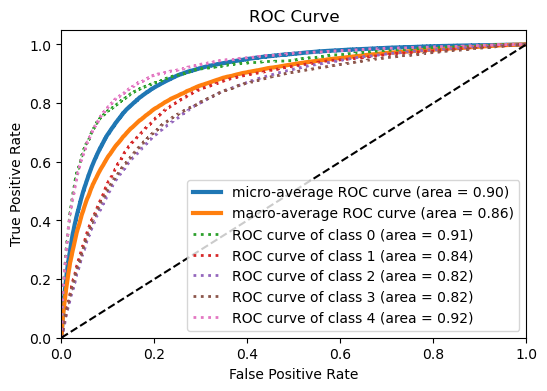

In [71]:
plot_model_roc_curve(lsvc , tv_test_features, sentiments_test, label_encoder=None, class_names=None)

In [74]:
tf = TfidfVectorizer() 
Xtrain_tf = tf.fit_transform(phrase_train)
Xtest_tf = tf.transform(phrase_test)
Ytrain = sentiments_train

In [77]:
from sklearn.model_selection import GridSearchCV
clf_lr = LogisticRegression()
param_grid_lr = {'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3], 'penalty': ['l1', 'l2']}
gridsearch_lr = GridSearchCV(clf_lr, param_grid_lr)
gridsearch_lr.fit(Xtrain_tf, Ytrain);
gridsearch_lr.best_params_

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.3, 'penalty': 'l2'}

In [82]:
lr_g = LogisticRegression(penalty='l2', C=0.8)
# Logistic Regression model on BOW features
lr_g_bow_predictions = train_predict_model(classifier=lr_g, 
                                             train_features=cv_train_features, train_labels=sentiments_train,
                                             test_features=cv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_g_bow_predictions,
                                      classes=[0,1,2,3,4])

C:\APPS\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.6367
Precision: 0.6172
Recall: 0.6367
F1 Score: 0.6118

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.54      0.26      0.35      1426
           1       0.53      0.35      0.42      5428
           2       0.68      0.88      0.77     15995
           3       0.57      0.45      0.50      6603
           4       0.55      0.33      0.41      1760

    accuracy                           0.64     31212
   macro avg       0.58      0.45      0.49     31212
weighted avg       0.62      0.64      0.61     31212


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        370   629    366    54    7
        1        240  1907   2998   264   19
        2         52   810  14041  1032   60
        3         16   206   3019  2984